In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

### Problem 1:

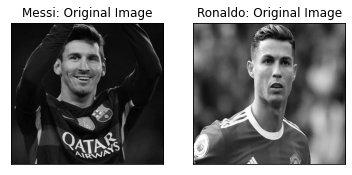

In [2]:
messi = cv2.imread('messi.jpg', 0)
ronaldo = cv2.imread('ronaldo.jpg', 0)

rows, cols = messi.shape
# Maching the Size of Images together:
ronaldo = cv2.resize(ronaldo, (cols, rows), interpolation=cv2.INTER_LANCZOS4)

plt.figure(1)
plt.subplot(121), plt.imshow(messi, cmap='gray'), plt.title('Messi: Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(ronaldo, cmap='gray'), plt.title('Ronaldo: Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

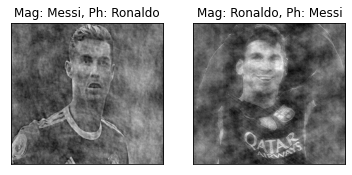

In [3]:
# Calculation of Fourier Transform for 2 Pictures:
dft_messi = cv2.dft(np.float32(messi), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_ronaldo = cv2.dft(np.float32(ronaldo), flags=cv2.DFT_COMPLEX_OUTPUT)

# Separation of Magnitude and Phase for 2 Pictures:
magnitude_messi, phase_messi = cv2.cartToPolar(dft_messi[:, :, 0], dft_messi[:, :, 1])
magnitude_ronaldo, phase_ronaldo = cv2.cartToPolar(dft_ronaldo[:, :, 0], dft_ronaldo[:, :, 1])

# Separation of the Real Part and Imaginary Part for Merged Pictures by the Magnitude of One of the Pictures and the Phase of the other Picture:
magnitude_messi_phase_ronaldo_real, magnitude_messi_phase_ronaldo_imag = cv2.polarToCart(magnitude_messi, phase_ronaldo)
magnitude_ronaldo_phase_messi_real, magnitude_ronaldo_phase_messi_imag = cv2.polarToCart(magnitude_ronaldo, phase_messi)

dimensions = dft_messi.shape
magnitude_messi_phase_ronaldo = np.zeros(dimensions)
magnitude_ronaldo_phase_messi = np.zeros(dimensions)

magnitude_messi_phase_ronaldo[:, :, 0] = magnitude_messi_phase_ronaldo_real
magnitude_messi_phase_ronaldo[:, :, 1] = magnitude_messi_phase_ronaldo_imag

magnitude_ronaldo_phase_messi[:, :, 0] = magnitude_ronaldo_phase_messi_real
magnitude_ronaldo_phase_messi[:, :, 1] = magnitude_ronaldo_phase_messi_imag

# Calculation of Inverse Fourier Transform:
mag_messi_ph_ronaldo = cv2.idft(magnitude_messi_phase_ronaldo)
mag_ronaldo_ph_messi = cv2.idft(magnitude_ronaldo_phase_messi)

mag_messi_ph_ronaldo_real = mag_messi_ph_ronaldo[:, :, 0]
mag_ronaldo_ph_messi_real = mag_ronaldo_ph_messi[:, :, 0]

# Showing the Real Part of the Merged Images:
plt.figure(1)
plt.subplot(121), plt.imshow(mag_messi_ph_ronaldo_real, cmap='gray'), plt.title('Mag: Messi, Ph: Ronaldo'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(mag_ronaldo_ph_messi_real, cmap='gray'), plt.title('Mag: Ronaldo, Ph: Messi'), plt.xticks([]), plt.yticks([])
plt.show()

* **Analysis:**
For visual purposes, in humans, it seems that phase(Ph) is the more predominant component rather than the magnitude(Mag).